In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Get data from API
api_dadosabertosurl = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
resposta = requests.request("GET", api_dadosabertosurl, params={})
objetos = json.loads(resposta.text)
dados_df = pd.DataFrame(objetos['dados'])
# isolating useful data
dados_df = (dados_df[['id', 'nome', 'siglaPartido', "siglaUf"]])

In [33]:
# Create Dataframe
total_despesas_df = pd.DataFrame({
    "id": [],
    "despesas": []
})

In [32]:
dados_df.loc[466, 'despesas']

''

In [8]:
def obter_total_despesas(id_deputado):
    api_dadosabertos_despesas = ("https://dadosabertos.camara.leg.br/api/v2/deputados/{}/despesas?ordem=ASC&ordenarPor=ano".format(id_deputado))
    despesas_resposta = requests.get(api_dadosabertos_despesas)
    despesas = despesas_resposta.json()
    despesas_df = pd.DataFrame(despesas['dados'])
    if despesas_df.empty:
        pass
    else:
        total_despesas = despesas_df['valorDocumento'].sum()
        return {'id': id_deputado, 'despesas': total_despesas}

resultados = {}

resultados = dados_df['id'].apply(obter_total_despesas).fillna('').to_dict()

'''for id_deputado in dados_df['id']:
    resultado = obter_total_despesas(id_deputado)
    resultados.append(resultado)'''

total_despesas_df = pd.DataFrame(resultados)
total_despesas_df = total_despesas_df.T

In [26]:
total_despesas_df

,id,despesas
0,220593.0,10418.17
1,204379.0,3860.63
2,220714.0,2000.0
3,221328.0,19983.47
4,204560.0,6371.58
...,...,...
508,220558.0,40477.87
509,204517.0,2832.39
510,160592.0,26253.82
511,220592.0,2606.49


In [92]:
# Create new dict
results = []
for linha in range(len(dados_df.index)):
    id_deputado = dados_df.loc[linha, 'id']
    api_dadosabertos_despesas = ("https://dadosabertos.camara.leg.br/api/v2/deputados/{}/despesas?ordem=ASC&ordenarPor=ano".format(id_deputado))
    despesas_resposta = requests.get(api_dadosabertos_despesas)
    despesas = despesas_resposta.json()
    despesas_df = pd.DataFrame(despesas['dados'])
    if not despesas_df.empty:
        total_despesas = despesas_df['valorDocumento'].sum()
        new_row = {'id': id_deputado, 'despesas': total_despesas}
        total_despesas_df = total_despesas_df._append(new_row, ignore_index=True)
## Need optimization 7m 13.5s >> 5m 54.9s

In [27]:
# Merge DataFrames
dados_df = dados_df.merge(total_despesas_df)
dados_df

,id,nome,siglaPartido,siglaUf,despesas
0,220593,Abilio Brunini,PL,MT,10418.17
1,204379,Acácio Favacho,MDB,AP,3860.63
2,220714,Adail Filho,REPUBLICANOS,AM,2000.0
3,221328,Adilson Barroso,PL,SP,19983.47
4,204560,Adolfo Viana,PSDB,BA,6371.58
...,...,...,...,...,...
508,220558,Zé Trovão,PL,SC,40477.87
509,204517,Zé Vitor,PL,MG,2832.39
510,160592,Zeca Dirceu,PT,PR,26253.82
511,220592,Zezinho Barbary,PP,AC,2606.49


[]

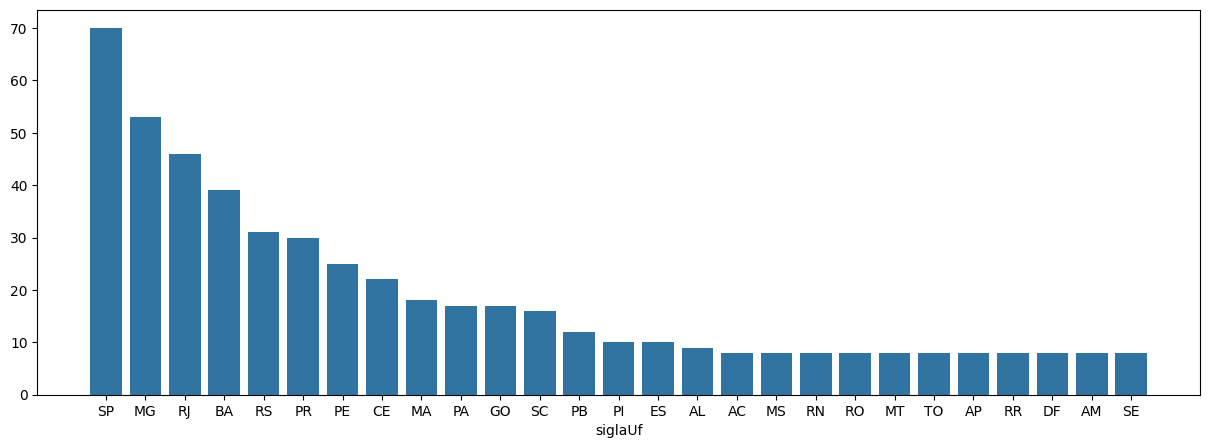

In [28]:
# Number of deputies by each Uf
x = dados_df['siglaUf'].value_counts().index
y = dados_df['siglaUf'].value_counts().values
plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y)
plt.plot()

[]

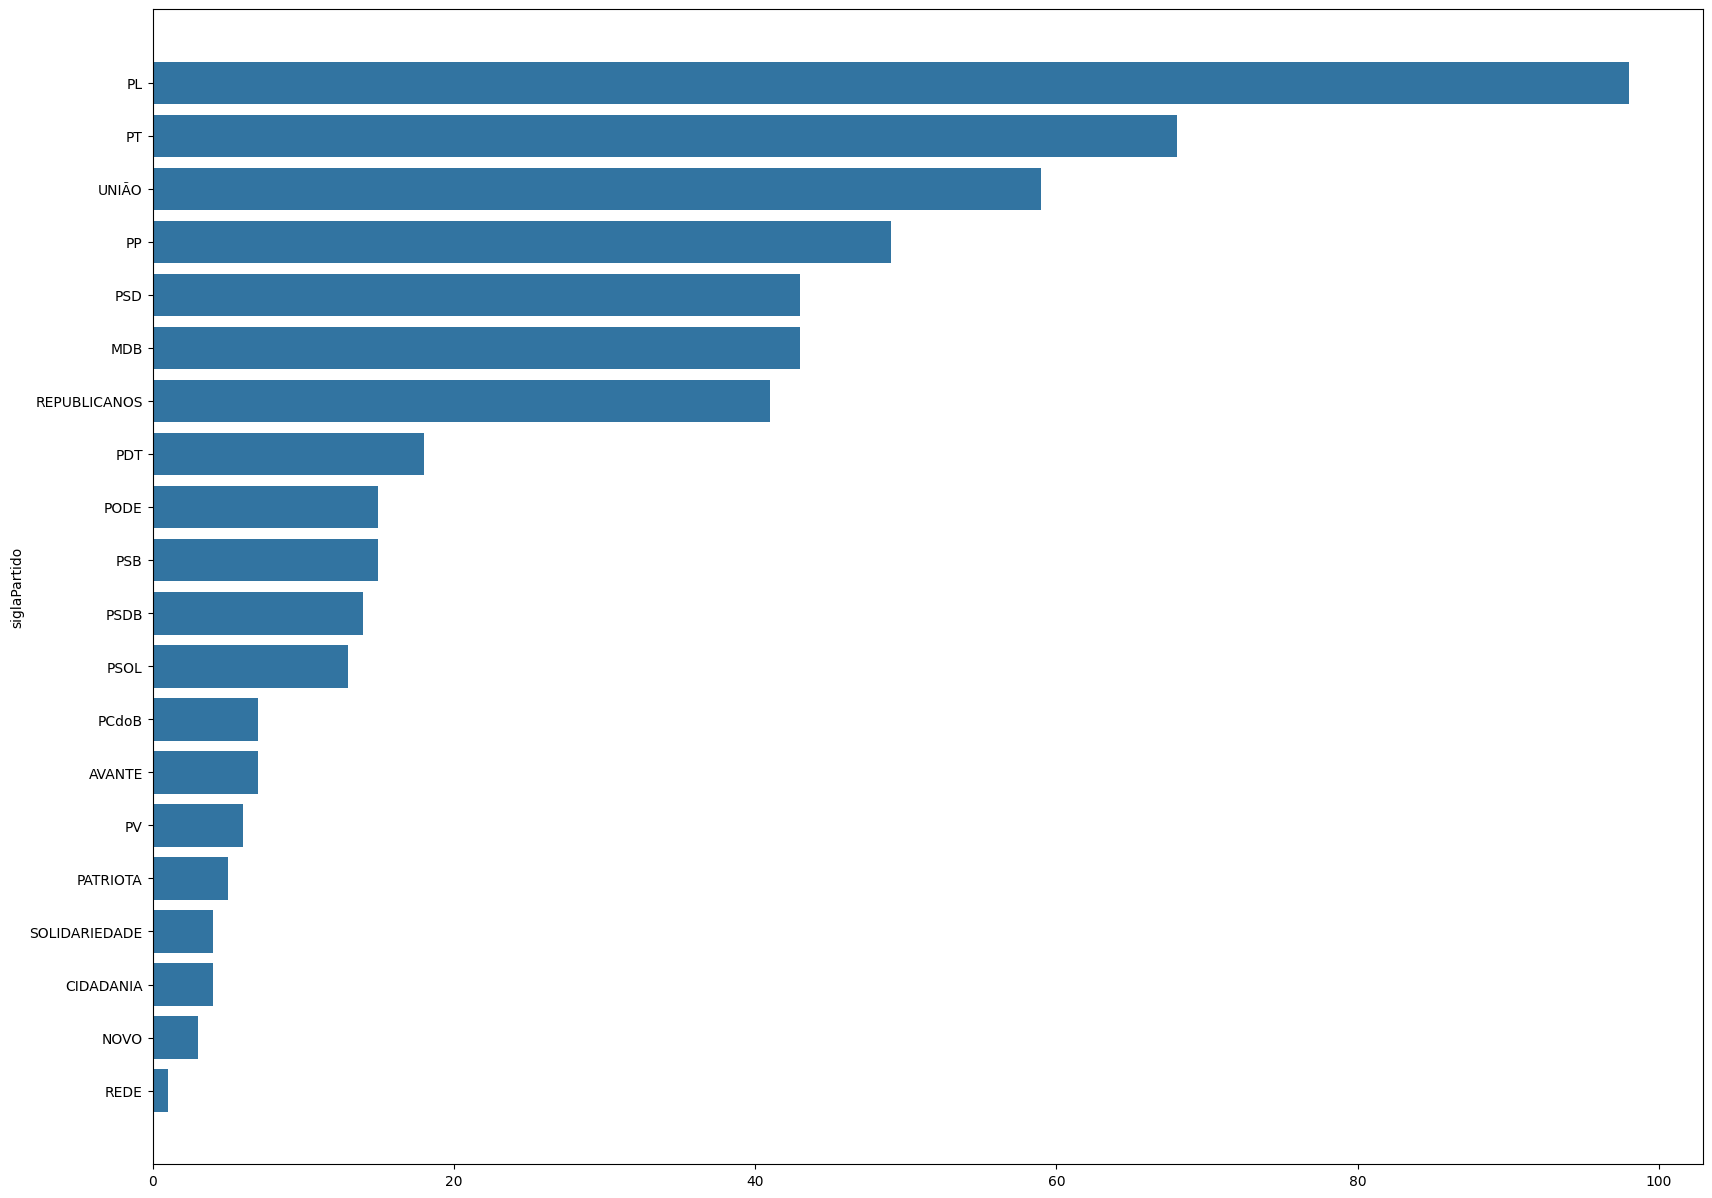

In [29]:
# Number of deputies by each party
x = dados_df['siglaPartido'].value_counts().values
y = dados_df['siglaPartido'].value_counts().index
plt.figure(figsize = (20, 15))
sns.barplot(x=x, y=y)
plt.plot()

In [30]:
test_df = dados_df.sort_values(by=['Despesas', 'nome'], ascending=False)
test_df = test_df.dropna()
test_df.loc[466, 'Despesas']

KeyError: 'Despesas'

TypeError: 'value' must be an instance of str or bytes, not a float

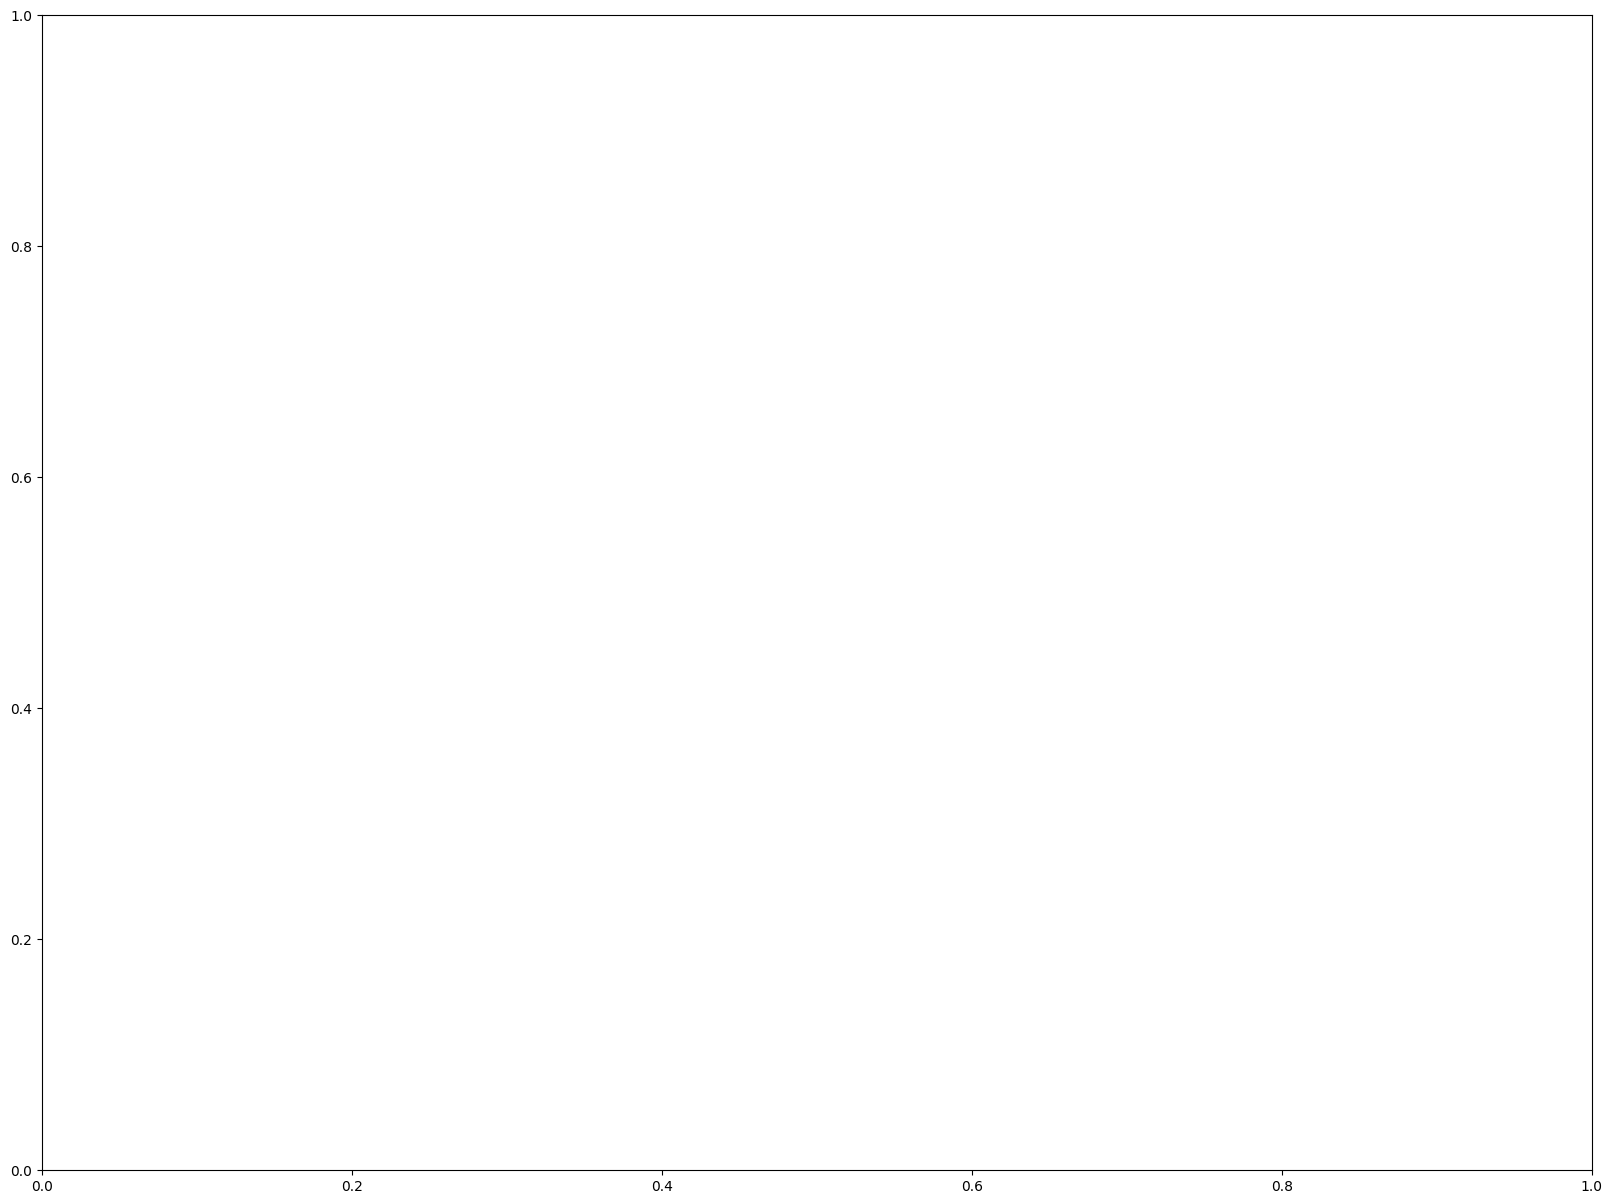

In [80]:

# Graph 3
x = test_df['nome'].value_counts().head(10).index
y = test_df['Despesas'].head(10).values
plt.figure(figsize = (20, 15))
sns.barplot(x=x, y=y)
plt.plot()